In [25]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, datasets, models 
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
datasets.cifar10.load_data()   # contains 2 2 tuple inside 2 tuple

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()
train_x.shape  #shape - (no. of images, height, width, channel)

(50000, 32, 32, 3)

In [4]:
#train_x[0]
classes = ["airplane", "automobile", "bird", "cat" , "deer" , "dog", "frog", "horse", "ship", "truck"]    #10 classes to classify
#plt.imshow(train_x[5]) 

In [5]:
#convert to 1-d array from 2-d 
train_y = train_y.reshape(-1)
test_y = test_y.reshape(-1)

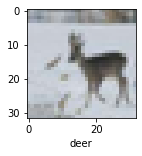

In [6]:
#to fetch image + label
def fetch(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
fetch(train_x, train_y, 20)    

In [7]:
train_x = train_x/255
test_x = test_x/255

In [8]:
cnn = models.Sequential([ layers.Conv2D(filters = 64, kernel_size = (3,3), activation ='relu', input_shape = (32,32,3)),
                   layers.MaxPooling2D((2,2)),
                   layers.Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'),
                   layers.MaxPooling2D((2,2)),
                   layers.Flatten(),
                   layers.Dense(64, activation = 'relu'),
                   layers.Dense(10, activation = 'softmax')    ])

In [9]:

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
cnn.fit(train_x,train_y,epochs = 10)

Epoch 1/10


1563/1563 [==============================] - 30s 18ms/step - loss: 1.4224 - accuracy: 0.4912
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0689 - accuracy: 0.6268
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9388 - accuracy: 0.6737
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8586 - accuracy: 0.7022
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7893 - accuracy: 0.7242
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7306 - accuracy: 0.7466
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6842 - accuracy: 0.7626
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6344 - accuracy: 0.7783
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.5968 - accuracy: 0.7903
Epoch 10/10
1563/1563 [==============================] - 29s 1

In [11]:
#accuracy of 0.63 on testing data and 0.69 on training data with 5 epoches, 1 conv2d(filter = 64) and 1 maxpool
#accuracy of 0.63 on testing data and 0.86 on training data with 10 epoches, 1 conv2d(filter = 64) and 1 maxpool -----overfitting
#accuracy of 0.70 on testing data and 0.78 on training data with 10 epoches, 2 conv2d(filter = 64) and 2 maxpool
cnn.evaluate(test_x, test_y)

313/313 [==============================] - 2s 6ms/step - loss: 0.9114 - accuracy: 0.7025


[0.9114463925361633, 0.7024999856948853]

In [45]:
prediction = cnn.predict(test_x) 
prediction_classes = [np.argmax(i) for i in prediction]
print(prediction_classes[0:5])   #our output
print(test_y[:5])  #original output

313/313 [==============================] - 2s 6ms/step
[3, 8, 0, 0, 4]
[3 8 8 0 6]


'cat'

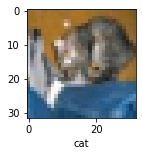

In [46]:
fetch(test_x, test_y, 0)   #original
classes[prediction_classes[0]]   #our

In [47]:
#classification report(combining above 2 cells)
y_pred = cnn.predict(test_x)    #this gives many 1-d array from which need the max element in each array therefore use argmax() and stor it in 1-d list
y_pred_classes = [np.argmax(i) for i in y_pred]    #argmax() returns the index of the biggest element
print(classification_report(test_y, y_pred_classes))   #so basically if our original output(test_y) is similar to our pred or not ...will give based on each classes

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.89      0.78      0.83      1000
           2       0.56      0.63      0.59      1000
           3       0.52      0.53      0.52      1000
           4       0.63      0.72      0.67      1000
           5       0.60      0.59      0.59      1000
           6       0.85      0.67      0.75      1000
           7       0.76      0.74      0.75      1000
           8       0.78      0.84      0.81      1000
           9       0.81      0.80      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

